<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/SLR_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

#membuka data
dt = pd.read_csv("Salary_Data.csv")
dt

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [133]:
#Cek Data
print(dt.info())
print(dt.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


<function matplotlib.pyplot.show>

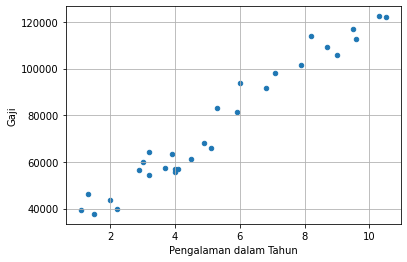

In [134]:
#Membuat Grafik
dt.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.xlabel('Pengalaman dalam Tahun')
plt.ylabel('Gaji')
plt.grid(True)
plt.show

In [135]:
#Penyesuaian Dataset
x = np.array(dt['YearsExperience'])
y = np.array(dt['Salary'])
print(f'x : {x}')
print(f'y : {y}')

x : [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
y : [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [136]:
x = x.reshape(-1,1)
x.shape
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [137]:
#Training Simple Linear Regression Model
model = LinearRegression()
model.fit(x,y)

LinearRegression()

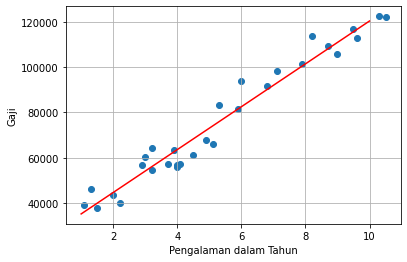

In [138]:
#Visualisasi
x_vis=np.array([10,1]).reshape(-1,1)
y_vis=model.predict(x_vis)

plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')
plt.xlabel('Pengalaman dalam Tahun')
plt.ylabel('Gaji')
plt.grid(True)
plt.show()

In [139]:
#Linear Regression : y=ax+b
print(f'nilai a : {model.intercept_}')
print(f'nilai b : {model.coef_}')

nilai a : 25792.200198668696
nilai b : [9449.96232146]


In [140]:
#Prediksi Gaji
YearsExperience = np.array([11,12,13]).reshape(-1,1)
YearsExperience

array([[11],
       [12],
       [13]])

In [141]:
prediksi_gaji = model.predict(YearsExperience)
prediksi_gaji

array([129741.78573467, 139191.74805613, 148641.71037758])

In [142]:
for ye,g in zip (YearsExperience, prediksi_gaji):
  print(f'Pengalaman dalam Tahun : {ye} Prediksi Gaji : {g}')

Pengalaman dalam Tahun : [11] Prediksi Gaji : 129741.78573467453
Pengalaman dalam Tahun : [12] Prediksi Gaji : 139191.7480561296
Pengalaman dalam Tahun : [13] Prediksi Gaji : 148641.71037758468


In [143]:
#Test Model pada Data Baris Ke-2
model.predict(np.array([1.5]).reshape(-1,1))

array([39967.14368085])

In [144]:
#Mengecek Validasi Model
x = sm.add_constant(x) 

olsmod = sm.OLS(y, x).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        03:48:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0

In [145]:
#Uji T
print(olsmod.pvalues)

[5.51195027e-12 1.14306811e-20]
